# RNN : 딥러닝의 flower

In [9]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

np.random.seed(3)
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

# 안 나누어도 되지만 정규화를 진행하면 편협적인 모델의 생성은 막을 수 있다.
X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

# 훈련셋, 검증셋 고르기
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)

In [7]:
print(np.random.choice(10,10)) #복원추출
print(np.random.choice(10,10, replace = False)) #비복원

[0 5 4 1 5 4 7 6 0 0]
[7 8 1 3 6 0 5 4 2 9]


In [10]:
X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]

In [13]:
X_train.shape #(700, 784)
# X_train[0].reshape(28,28)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [14]:
Y_train = np_utils.to_categorical(Y_train)
Y_val = np_utils.to_categorical(Y_val)
Y_test = np_utils.to_categorical(Y_test)

In [15]:
Y_train[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# modeling

In [24]:
model=Sequential()
model.add(Dense(units=2 , input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax')) #0~9까지의 숫자니까 unit=10

In [25]:
model.compile(loss='categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

In [26]:
hist=model.fit(X_train, Y_train, epochs=300, batch_size=10, validation_data=(X_val, Y_val))
#validation loss가 올라가기 시작하면 과적합에 빠진것이다. 
#과적합에 빠지기전에 중단하는게 좋다.
# 70/70 [==============================] 
# - 0s 825us/step - loss: 0.2678 - accuracy: 0.9314 
# - val_loss: 5.2011 - val_accuracy: 0.4567

Epoch 1/300
70/70 [==============================] - 0s 2ms/step - loss: 2.2325 - accuracy: 0.1500 - val_loss: 2.1515 - val_accuracy: 0.2200
Epoch 2/300
70/70 [==============================] - 0s 757us/step - loss: 2.1456 - accuracy: 0.1871 - val_loss: 2.0724 - val_accuracy: 0.2433
Epoch 3/300
70/70 [==============================] - 0s 732us/step - loss: 2.0924 - accuracy: 0.2143 - val_loss: 2.0314 - val_accuracy: 0.2733
Epoch 4/300
70/70 [==============================] - 0s 717us/step - loss: 2.0491 - accuracy: 0.2400 - val_loss: 1.9814 - val_accuracy: 0.2733
Epoch 5/300
70/70 [==============================] - 0s 751us/step - loss: 2.0113 - accuracy: 0.2457 - val_loss: 1.9499 - val_accuracy: 0.2967
Epoch 6/300
70/70 [==============================] - 0s 745us/step - loss: 1.9752 - accuracy: 0.2600 - val_loss: 1.9151 - val_accuracy: 0.3000
Epoch 7/300
70/70 [==============================] - 0s 737us/step - loss: 1.9403 - accuracy: 0.2686 - val_loss: 1.8810 - val_accuracy: 0.2933
E

Epoch 58/300
70/70 [==============================] - 0s 754us/step - loss: 1.2853 - accuracy: 0.5129 - val_loss: 1.4372 - val_accuracy: 0.4533
Epoch 59/300
70/70 [==============================] - 0s 742us/step - loss: 1.2791 - accuracy: 0.5057 - val_loss: 1.4321 - val_accuracy: 0.4567
Epoch 60/300
70/70 [==============================] - 0s 706us/step - loss: 1.2741 - accuracy: 0.5186 - val_loss: 1.4332 - val_accuracy: 0.4600
Epoch 61/300
70/70 [==============================] - 0s 730us/step - loss: 1.2675 - accuracy: 0.5129 - val_loss: 1.4298 - val_accuracy: 0.4467
Epoch 62/300
70/70 [==============================] - 0s 739us/step - loss: 1.2605 - accuracy: 0.5157 - val_loss: 1.4233 - val_accuracy: 0.4533
Epoch 63/300
70/70 [==============================] - 0s 753us/step - loss: 1.2551 - accuracy: 0.5243 - val_loss: 1.4129 - val_accuracy: 0.4567
Epoch 64/300
70/70 [==============================] - 0s 748us/step - loss: 1.2491 - accuracy: 0.5243 - val_loss: 1.4195 - val_accuracy:

Epoch 115/300
70/70 [==============================] - 0s 720us/step - loss: 1.0522 - accuracy: 0.6114 - val_loss: 1.3529 - val_accuracy: 0.5367
Epoch 116/300
70/70 [==============================] - 0s 732us/step - loss: 1.0495 - accuracy: 0.6114 - val_loss: 1.3507 - val_accuracy: 0.5400
Epoch 117/300
70/70 [==============================] - 0s 737us/step - loss: 1.0462 - accuracy: 0.6186 - val_loss: 1.3499 - val_accuracy: 0.5267
Epoch 118/300
70/70 [==============================] - 0s 735us/step - loss: 1.0440 - accuracy: 0.6129 - val_loss: 1.3474 - val_accuracy: 0.5367
Epoch 119/300
70/70 [==============================] - 0s 724us/step - loss: 1.0426 - accuracy: 0.6114 - val_loss: 1.3463 - val_accuracy: 0.5300
Epoch 120/300
70/70 [==============================] - 0s 777us/step - loss: 1.0388 - accuracy: 0.6157 - val_loss: 1.3549 - val_accuracy: 0.5367
Epoch 121/300
70/70 [==============================] - 0s 819us/step - loss: 1.0355 - accuracy: 0.6214 - val_loss: 1.3463 - val_ac

70/70 [==============================] - 0s 725us/step - loss: 0.9416 - accuracy: 0.6443 - val_loss: 1.3826 - val_accuracy: 0.5400
Epoch 172/300
70/70 [==============================] - 0s 714us/step - loss: 0.9392 - accuracy: 0.6471 - val_loss: 1.3920 - val_accuracy: 0.5433
Epoch 173/300
70/70 [==============================] - 0s 728us/step - loss: 0.9368 - accuracy: 0.6486 - val_loss: 1.3825 - val_accuracy: 0.5333
Epoch 174/300
70/70 [==============================] - 0s 735us/step - loss: 0.9373 - accuracy: 0.6514 - val_loss: 1.3865 - val_accuracy: 0.5333
Epoch 175/300
70/70 [==============================] - 0s 747us/step - loss: 0.9327 - accuracy: 0.6514 - val_loss: 1.3986 - val_accuracy: 0.5400
Epoch 176/300
70/70 [==============================] - 0s 733us/step - loss: 0.9330 - accuracy: 0.6443 - val_loss: 1.3852 - val_accuracy: 0.5333
Epoch 177/300
70/70 [==============================] - 0s 746us/step - loss: 0.9320 - accuracy: 0.6457 - val_loss: 1.3979 - val_accuracy: 0.5500

70/70 [==============================] - 0s 767us/step - loss: 0.8647 - accuracy: 0.6729 - val_loss: 1.4421 - val_accuracy: 0.5333
Epoch 228/300
70/70 [==============================] - 0s 747us/step - loss: 0.8631 - accuracy: 0.6786 - val_loss: 1.4469 - val_accuracy: 0.5367
Epoch 229/300
70/70 [==============================] - 0s 728us/step - loss: 0.8620 - accuracy: 0.6843 - val_loss: 1.4548 - val_accuracy: 0.5400
Epoch 230/300
70/70 [==============================] - 0s 732us/step - loss: 0.8597 - accuracy: 0.6814 - val_loss: 1.4477 - val_accuracy: 0.5367
Epoch 231/300
70/70 [==============================] - 0s 731us/step - loss: 0.8598 - accuracy: 0.6829 - val_loss: 1.4483 - val_accuracy: 0.5400
Epoch 232/300
70/70 [==============================] - 0s 718us/step - loss: 0.8574 - accuracy: 0.6757 - val_loss: 1.4466 - val_accuracy: 0.5300
Epoch 233/300
70/70 [==============================] - 0s 726us/step - loss: 0.8585 - accuracy: 0.6800 - val_loss: 1.4424 - val_accuracy: 0.5333

70/70 [==============================] - 0s 720us/step - loss: 0.8070 - accuracy: 0.7014 - val_loss: 1.5170 - val_accuracy: 0.5467
Epoch 284/300
70/70 [==============================] - 0s 729us/step - loss: 0.8044 - accuracy: 0.7071 - val_loss: 1.5226 - val_accuracy: 0.5500
Epoch 285/300
70/70 [==============================] - 0s 782us/step - loss: 0.8047 - accuracy: 0.6986 - val_loss: 1.5155 - val_accuracy: 0.5267
Epoch 286/300
70/70 [==============================] - 0s 769us/step - loss: 0.8050 - accuracy: 0.7057 - val_loss: 1.5120 - val_accuracy: 0.5400
Epoch 287/300
70/70 [==============================] - 0s 878us/step - loss: 0.8041 - accuracy: 0.7129 - val_loss: 1.5158 - val_accuracy: 0.5400
Epoch 288/300
70/70 [==============================] - 0s 779us/step - loss: 0.8008 - accuracy: 0.7029 - val_loss: 1.5286 - val_accuracy: 0.5300
Epoch 289/300
70/70 [==============================] - 0s 785us/step - loss: 0.8021 - accuracy: 0.7043 - val_loss: 1.5180 - val_accuracy: 0.5433

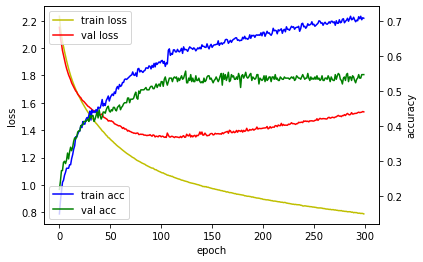

In [27]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()
#한 150 에폭 정도에 있는 과적합은 감내 하겠다..
# 과적합은 50즈음에 일어남.

In [28]:
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)

print('')
print('loss : ' + str(loss_and_metrics[0]))
print('accuracy : ' + str(loss_and_metrics[1]))

313/313 [==============================] - 0s 687us/step - loss: 1.5120 - accuracy: 0.5075

loss : 1.5120080709457397
accuracy : 0.5074999928474426


#### 조기종료를 시키는 early stopping 코드가 있다.
- 종료를 하는 환경이 되면 알아서 종료
- 사용자가 설정한 환경이 되었을때, 시스템에 의해 자동으로 호출되는 함수 => 콜백함수
    - monitor: 관찰항목(val loss, val acc)
    - min_delta: 개선되고 있다고 판단하기 위한 최소 변화량
        - 변화량이 mindelta보다 작으면 개선이 안된것으로 판단
    - patience: 개선이 없다고 해서 바로 종료되는게 아니라..
        - 몇 epochs동안 참아줄 수 있나? (ex. 10이면, 개선이 없는 에폭 10번을 참겠다)
    - mode: 개선이 없다고 판단하기 위한 기준
        - ex)관찰항목: val loss인 경우, 감소되는 것이 멈출때 트레이닝을 종료하므로, 
            이런경우에는 mode를 min으로 설정
        - acc 는 mode를 max로 설정

In [29]:
from keras.callbacks import EarlyStopping

In [30]:
# es=EarlyStopping() #default val-loss가 안하면

In [ ]:
# 기본설정
# tf.keras.callbacks.EarlyStopping(
#     monitor="val_loss",
#     min_delta=0,
#     patience=0,
#     verbose=0,
#     mode="auto",
#     baseline=None,
#     restore_best_weights=False,
# )

In [39]:
es=EarlyStopping(patience=20)

In [49]:
model=Sequential()
model.add(Dense(units=2 , input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax')) #0~9까지의 숫자니까 unit=10

In [50]:
model.compile(loss='categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

In [46]:
model.fit(X_train, Y_train, epochs=500, batch_size=10, 
               validation_data=(X_val, Y_val), callbacks=[es])

Epoch 1/500
70/70 [==============================] - 0s 2ms/step - loss: 2.2897 - accuracy: 0.1029 - val_loss: 2.2874 - val_accuracy: 0.0800
Epoch 2/500
70/70 [==============================] - 0s 766us/step - loss: 2.2638 - accuracy: 0.1229 - val_loss: 2.2709 - val_accuracy: 0.1133
Epoch 3/500
70/70 [==============================] - 0s 732us/step - loss: 2.2418 - accuracy: 0.1343 - val_loss: 2.2625 - val_accuracy: 0.1133
Epoch 4/500
70/70 [==============================] - 0s 767us/step - loss: 2.2237 - accuracy: 0.1329 - val_loss: 2.2432 - val_accuracy: 0.1233
Epoch 5/500
70/70 [==============================] - 0s 737us/step - loss: 2.2052 - accuracy: 0.1757 - val_loss: 2.2249 - val_accuracy: 0.1467
Epoch 6/500
70/70 [==============================] - 0s 768us/step - loss: 2.1861 - accuracy: 0.1843 - val_loss: 2.2100 - val_accuracy: 0.1567
Epoch 7/500
70/70 [==============================] - 0s 759us/step - loss: 2.1601 - accuracy: 0.2043 - val_loss: 2.1836 - val_accuracy: 0.1767
E

Epoch 58/500
70/70 [==============================] - 0s 763us/step - loss: 1.2446 - accuracy: 0.5571 - val_loss: 1.4156 - val_accuracy: 0.5033
Epoch 59/500
70/70 [==============================] - 0s 733us/step - loss: 1.2376 - accuracy: 0.5843 - val_loss: 1.4127 - val_accuracy: 0.5133
Epoch 60/500
70/70 [==============================] - 0s 738us/step - loss: 1.2309 - accuracy: 0.5786 - val_loss: 1.4056 - val_accuracy: 0.5100
Epoch 61/500
70/70 [==============================] - 0s 747us/step - loss: 1.2244 - accuracy: 0.5800 - val_loss: 1.4086 - val_accuracy: 0.5167
Epoch 62/500
70/70 [==============================] - 0s 737us/step - loss: 1.2195 - accuracy: 0.5671 - val_loss: 1.4097 - val_accuracy: 0.5033
Epoch 63/500
70/70 [==============================] - 0s 750us/step - loss: 1.2125 - accuracy: 0.5886 - val_loss: 1.4110 - val_accuracy: 0.4867
Epoch 64/500
70/70 [==============================] - 0s 768us/step - loss: 1.2060 - accuracy: 0.6014 - val_loss: 1.3964 - val_accuracy:

Epoch 115/500
70/70 [==============================] - 0s 763us/step - loss: 1.0002 - accuracy: 0.6557 - val_loss: 1.3168 - val_accuracy: 0.5333
Epoch 116/500
70/70 [==============================] - 0s 768us/step - loss: 0.9986 - accuracy: 0.6543 - val_loss: 1.3332 - val_accuracy: 0.5233
Epoch 117/500
70/70 [==============================] - 0s 770us/step - loss: 0.9994 - accuracy: 0.6571 - val_loss: 1.3162 - val_accuracy: 0.5200
Epoch 118/500
70/70 [==============================] - 0s 754us/step - loss: 0.9942 - accuracy: 0.6471 - val_loss: 1.3132 - val_accuracy: 0.5500
Epoch 119/500
70/70 [==============================] - 0s 709us/step - loss: 0.9910 - accuracy: 0.6500 - val_loss: 1.3224 - val_accuracy: 0.5233
Epoch 120/500
70/70 [==============================] - 0s 762us/step - loss: 0.9904 - accuracy: 0.6329 - val_loss: 1.3191 - val_accuracy: 0.5500
Epoch 121/500
70/70 [==============================] - 0s 761us/step - loss: 0.9879 - accuracy: 0.6429 - val_loss: 1.3198 - val_ac

In [49]:
model=Sequential()
model.add(Dense(units=2 , input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax')) #0~9까지의 숫자니까 unit=10

In [50]:
model.compile(loss='categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

In [52]:
# early stopping 이후에 적절한 epoch를 찾아서 모델 저장
hist=model.fit(X_train, Y_train, epochs=163, batch_size=10, 
               validation_data=(X_val, Y_val), callbacks=[es])

Epoch 1/163
70/70 [==============================] - 0s 2ms/step - loss: 2.2390 - accuracy: 0.1229 - val_loss: 2.1779 - val_accuracy: 0.1100
Epoch 2/163
70/70 [==============================] - 0s 732us/step - loss: 2.1569 - accuracy: 0.1657 - val_loss: 2.1086 - val_accuracy: 0.1167
Epoch 3/163
70/70 [==============================] - 0s 709us/step - loss: 2.0944 - accuracy: 0.1271 - val_loss: 2.0556 - val_accuracy: 0.1267
Epoch 4/163
70/70 [==============================] - 0s 723us/step - loss: 2.0409 - accuracy: 0.2157 - val_loss: 2.0049 - val_accuracy: 0.1900
Epoch 5/163
70/70 [==============================] - 0s 737us/step - loss: 1.9907 - accuracy: 0.2429 - val_loss: 1.9648 - val_accuracy: 0.2133
Epoch 6/163
70/70 [==============================] - 0s 721us/step - loss: 1.9465 - accuracy: 0.2543 - val_loss: 1.9254 - val_accuracy: 0.2133
Epoch 7/163
70/70 [==============================] - 0s 740us/step - loss: 1.9049 - accuracy: 0.2714 - val_loss: 1.8875 - val_accuracy: 0.2167
E

Epoch 58/163
70/70 [==============================] - 0s 739us/step - loss: 1.2485 - accuracy: 0.5329 - val_loss: 1.3609 - val_accuracy: 0.4900
Epoch 59/163
70/70 [==============================] - 0s 730us/step - loss: 1.2434 - accuracy: 0.5429 - val_loss: 1.3468 - val_accuracy: 0.5000
Epoch 60/163
70/70 [==============================] - 0s 739us/step - loss: 1.2370 - accuracy: 0.5386 - val_loss: 1.3399 - val_accuracy: 0.4933
Epoch 61/163
70/70 [==============================] - 0s 713us/step - loss: 1.2333 - accuracy: 0.5314 - val_loss: 1.3489 - val_accuracy: 0.4833
Epoch 62/163
70/70 [==============================] - 0s 778us/step - loss: 1.2300 - accuracy: 0.5414 - val_loss: 1.3377 - val_accuracy: 0.4900
Epoch 63/163
70/70 [==============================] - 0s 713us/step - loss: 1.2239 - accuracy: 0.5443 - val_loss: 1.3304 - val_accuracy: 0.5067
Epoch 64/163
70/70 [==============================] - 0s 717us/step - loss: 1.2191 - accuracy: 0.5614 - val_loss: 1.3349 - val_accuracy:

Epoch 115/163
70/70 [==============================] - 0s 747us/step - loss: 1.0617 - accuracy: 0.6086 - val_loss: 1.2626 - val_accuracy: 0.5200
Epoch 116/163
70/70 [==============================] - 0s 710us/step - loss: 1.0625 - accuracy: 0.6243 - val_loss: 1.2708 - val_accuracy: 0.5433
Epoch 117/163
70/70 [==============================] - 0s 717us/step - loss: 1.0595 - accuracy: 0.6186 - val_loss: 1.2611 - val_accuracy: 0.5400
Epoch 118/163
70/70 [==============================] - 0s 765us/step - loss: 1.0586 - accuracy: 0.6100 - val_loss: 1.2734 - val_accuracy: 0.5467
Epoch 119/163
70/70 [==============================] - 0s 755us/step - loss: 1.0548 - accuracy: 0.6243 - val_loss: 1.2657 - val_accuracy: 0.5433
Epoch 120/163
70/70 [==============================] - 0s 760us/step - loss: 1.0521 - accuracy: 0.6257 - val_loss: 1.2747 - val_accuracy: 0.5400
Epoch 121/163
70/70 [==============================] - 0s 785us/step - loss: 1.0472 - accuracy: 0.6214 - val_loss: 1.2827 - val_ac

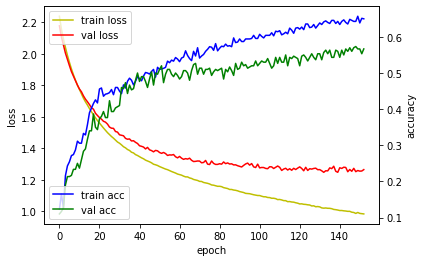

In [53]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()
# 에폭 과적합을 20번정도 참은 결과.

# 전체적인 과정

In [57]:
# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
from numpy import argmax

# 1. 데이터셋 생성하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터셋 전처리
x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0

# 원핫인코딩 (one-hot encoding) 처리
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# 훈련셋과 검증셋 분리
x_val = x_train[:42000] # 훈련셋의 30%를 검증셋으로 사용
x_train = x_train[42000:]
y_val = y_train[:42000] # 훈련셋의 30%를 검증셋으로 사용
y_train = y_train[42000:]

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_val, y_val))

# 5. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('')
print('loss_and_metrics : ' + str(loss_and_metrics))

# 6. 모델 사용하기
xhat_idx = np.random.choice(x_test.shape[0], 5)
xhat = x_test[xhat_idx]
yhat = model.predict_classes(xhat)

for i in range(5):
    print('True : ' + str(argmax(y_test[xhat_idx[i]])) + ', Predict : ' + str(yhat[i]))    


Epoch 1/5
563/563 [==============================] - 1s 2ms/step - loss: 1.1430 - accuracy: 0.7202 - val_loss: 0.6508 - val_accuracy: 0.8414
Epoch 2/5
563/563 [==============================] - 1s 2ms/step - loss: 0.5153 - accuracy: 0.8690 - val_loss: 0.4802 - val_accuracy: 0.8694
Epoch 3/5
563/563 [==============================] - 1s 2ms/step - loss: 0.4124 - accuracy: 0.8868 - val_loss: 0.4127 - val_accuracy: 0.8851
Epoch 4/5
563/563 [==============================] - 1s 2ms/step - loss: 0.3659 - accuracy: 0.8971 - val_loss: 0.3804 - val_accuracy: 0.8937
Epoch 5/5
313/313 [==============================] - 0s 490us/step - loss: 0.3281 - accuracy: 0.9078

loss_and_metrics : [0.32811465859413147, 0.907800018787384]
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classifica

## 모델을 저장하고 다시 사용하고 싶을때

In [58]:
from keras.models import load_model

In [59]:
model.save("mymnist.h5")

In [60]:
model.summary() # parameter: weight, bias 가 저장되는 것이다.

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [63]:
print(784*64+64)
print("weight: 784*64")
print("bias: +64")

50240
weight: 784*64
bias: +64


#### model 재탕하기

In [ ]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
from numpy import argmax

In [83]:
# 불러오기
model=load_model("mymnist.h5")

In [89]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0
y_test = np_utils.to_categorical(y_test)
xhat_idx = np.random.choice(x_test.shape[0], 5)
xhat = x_test[xhat_idx]

In [90]:
yhat = model.predict_classes(xhat)

In [91]:
for i in range(5):
    print('True : ' + str(argmax(y_test[xhat_idx[i]])) + ', Predict : ' + str(yhat[i]))    

True : 0, Predict : 0
True : 4, Predict : 4
True : 8, Predict : 8
True : 9, Predict : 9
True : 6, Predict : 6


# RNN을 이용한 수열 생성

- [0.0 0.1 0.2 0.3] -> 0.4 예측

- 모든 RNN-cell에서 출력이 있을경우 
- 옵션: 
- return_sequences = True (다 : 다)
    - 맨 마지막에 출력할경우 -> return_sequences = False : 감성분석 맨마지막에만 결과 긍정/부정 (다 : 1)
- return_state: cell상태 출력
- activation = tanh, relu 등등..

In [92]:
from keras.layers import Input, Dense, LSTM, Embedding, SimpleRNN
from keras.models import Model
from keras.models import Sequential
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
import numpy as np

In [95]:
#rnn cell을 만드는 방법은 여러가지가 있는데 그중 하나.
# SimpleRNN 간단한 rnn 생성
# 4개가 들어갔을때 값이 1개가 나오도록 만들기
model=Sequential([SimpleRNN(units=1, #출력되어야할 데이터는 1개
                  activation='tanh',
                  return_sequences=False,
                  return_state=True)]) 

In [96]:
# 입출력을 이런 순서대로 한단계씩 나아가면서 진행
# 전체적으로 트레이닝을 100번 해보기 : 100 epochs
X = [] 
Y = [] 
for i in range(6): 
    lst = list(range(i,i+4)) 
    X.append(list(map(lambda c: [c/10], lst))) 
    Y.append((i+4)/10) 
X = np.array(X) 
Y = np.array(Y) 
print(X)  #6,4,1 (shape)
print(Y)

#예측은 전혀 다른 값 주기
# 1.0, 1.1, 1.2, 1.3 -> 1.4예측을 원함

[[[0. ]
  [0.1]
  [0.2]
  [0.3]]

 [[0.1]
  [0.2]
  [0.3]
  [0.4]]

 [[0.2]
  [0.3]
  [0.4]
  [0.5]]

 [[0.3]
  [0.4]
  [0.5]
  [0.6]]

 [[0.4]
  [0.5]
  [0.6]
  [0.7]]

 [[0.5]
  [0.6]
  [0.7]
  [0.8]]]
[0.4 0.5 0.6 0.7 0.8 0.9]


In [109]:
X.shape # (6건, 4행, 1열)
Y.shape

(6,)

In [130]:
model=Sequential([SimpleRNN(units=10, #히든계층: 10개
                  return_sequences=False,
                  input_shape=[4,1]),
                 Dense(1)]) #Dense(1), output:1개

In [131]:
model.compile(optimizer='adam', loss='mse')

In [132]:
history=model.fit(X,Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 1ms/step - loss: 0.6209
Epoch 2/100
1/1 [==============================] - 0s 524us/step - loss: 0.5806
Epoch 3/100
1/1 [==============================] - 0s 595us/step - loss: 0.5419
Epoch 4/100
1/1 [==============================] - 0s 560us/step - loss: 0.5047
Epoch 5/100
1/1 [==============================] - 0s 533us/step - loss: 0.4692
Epoch 6/100
1/1 [==============================] - 0s 747us/step - loss: 0.4352
Epoch 7/100
1/1 [==============================] - 0s 549us/step - loss: 0.4028
Epoch 8/100
1/1 [==============================] - 0s 536us/step - loss: 0.3720
Epoch 9/100
1/1 [==============================] - 0s 465us/step - loss: 0.3427
Epoch 10/100
1/1 [==============================] - 0s 540us/step - loss: 0.3149
Epoch 11/100
1/1 [==============================] - 0s 568us/step - loss: 0.2887
Epoch 12/100
1/1 [==============================] - 0s 660us/step - loss: 0.2639
Epoch 13/100
1/1 [=====================

In [133]:
# 6건 4행 1열
sooneung=np.array([[[1.0],[1.1],[1.2],[1.3]]])
print(model.predict(sooneung))

[[0.97039825]]


In [134]:
sooneung=np.array([[[0.6],[0.7],[0.8],[0.9]]])
print(model.predict(sooneung))

[[0.92008185]]


In [139]:
sooneung=np.array([[[0.2],[0.3],[0.4],[0.5]]])
print(model.predict(sooneung))

[[0.6170091]]


##### 예제
- 입력(거래량, 하한가, 상한가, 시가, 종가 등 데이터) : 2017.1.1~2017.1.31
- 출력(종가) : 2017.2.1

In [140]:
## RNN 기반 문장 생성
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
from keras.utils import to_categorical

In [141]:
text="""인공지능을 공부하면서 코딩을 하고 있다\n
파이썬 코딩을 배우고 익혔다\n
딥러닝을 배우고 코딩을 하고 있다\n
파이썬 기반에서 판다스를 배우고 코딩을 했다\n"""

In [142]:
t=Tokenizer()

In [144]:
print(text)
t.fit_on_texts([text])

인공지능을 공부하면서 코딩을 하고 있다

파이썬 코딩을 배우고 익혔다

딥러닝을 배우고 코딩을 하고 있다

파이썬 기반에서 판다스를 배우고 코딩을 했다



In [145]:
# 단순히 띄어쓰기 단위로 피팅..
# 형태소 분석 아님
#fit 후에..
t.word_index

{'코딩을': 1,
 '배우고': 2,
 '하고': 3,
 '있다': 4,
 '파이썬': 5,
 '인공지능을': 6,
 '공부하면서': 7,
 '익혔다': 8,
 '딥러닝을': 9,
 '기반에서': 10,
 '판다스를': 11,
 '했다': 12}

In [146]:
t.index_word

{1: '코딩을',
 2: '배우고',
 3: '하고',
 4: '있다',
 5: '파이썬',
 6: '인공지능을',
 7: '공부하면서',
 8: '익혔다',
 9: '딥러닝을',
 10: '기반에서',
 11: '판다스를',
 12: '했다'}

In [151]:
t.word_counts

OrderedDict([('인공지능을', 1),
             ('공부하면서', 1),
             ('코딩을', 4),
             ('하고', 2),
             ('있다', 2),
             ('파이썬', 2),
             ('배우고', 3),
             ('익혔다', 1),
             ('딥러닝을', 1),
             ('기반에서', 1),
             ('판다스를', 1),
             ('했다', 1)])

In [153]:
len(t.word_index)

12

In [155]:
# 딥러닝시에 길이를 맞추려고 한다. 
# 이부분을 다시 공부
vocab_size=len(t.word_index)+1
print('단어 크기: %d' % vocab_size)

단어 크기: 13


In [182]:
sequences = list()
for line in text.split('\n'): 
#     print(line)
#     print(t.texts_to_sequences([line])) #index가 나온다.
#     print(t.texts_to_sequences([line])[0])
    encoded = t.texts_to_sequences([line])[0]
#     print(encoded)
    for i in range(1, len(encoded)):
        sequence = encoded[:i+1]
        sequences.append(sequence)

In [184]:
sequences #입력데이터의 길이가 다 같아야한다. 주로 0으로 패팅한다.

[[6, 7],
 [6, 7, 1],
 [6, 7, 1, 3],
 [6, 7, 1, 3, 4],
 [5, 1],
 [5, 1, 2],
 [5, 1, 2, 8],
 [9, 2],
 [9, 2, 1],
 [9, 2, 1, 3],
 [9, 2, 1, 3, 4],
 [5, 10],
 [5, 10, 11],
 [5, 10, 11, 2],
 [5, 10, 11, 2, 1],
 [5, 10, 11, 2, 1, 12]]

In [189]:
max_len=(max(len(i) for i in sequences))

In [190]:
len(sequences)

16

In [192]:
sequences=pad_sequences(sequences, maxlen=max_len, padding='pre')

In [193]:
sequences

array([[ 0,  0,  0,  0,  6,  7],
       [ 0,  0,  0,  6,  7,  1],
       [ 0,  0,  6,  7,  1,  3],
       [ 0,  6,  7,  1,  3,  4],
       [ 0,  0,  0,  0,  5,  1],
       [ 0,  0,  0,  5,  1,  2],
       [ 0,  0,  5,  1,  2,  8],
       [ 0,  0,  0,  0,  9,  2],
       [ 0,  0,  0,  9,  2,  1],
       [ 0,  0,  9,  2,  1,  3],
       [ 0,  9,  2,  1,  3,  4],
       [ 0,  0,  0,  0,  5, 10],
       [ 0,  0,  0,  5, 10, 11],
       [ 0,  0,  5, 10, 11,  2],
       [ 0,  5, 10, 11,  2,  1],
       [ 5, 10, 11,  2,  1, 12]], dtype=int32)

In [196]:
X=sequences[:,:-1]
y=sequences[:,-1]

In [197]:
X

array([[ 0,  0,  0,  0,  6],
       [ 0,  0,  0,  6,  7],
       [ 0,  0,  6,  7,  1],
       [ 0,  6,  7,  1,  3],
       [ 0,  0,  0,  0,  5],
       [ 0,  0,  0,  5,  1],
       [ 0,  0,  5,  1,  2],
       [ 0,  0,  0,  0,  9],
       [ 0,  0,  0,  9,  2],
       [ 0,  0,  9,  2,  1],
       [ 0,  9,  2,  1,  3],
       [ 0,  0,  0,  0,  5],
       [ 0,  0,  0,  5, 10],
       [ 0,  0,  5, 10, 11],
       [ 0,  5, 10, 11,  2],
       [ 5, 10, 11,  2,  1]], dtype=int32)

In [198]:
y

array([ 7,  1,  3,  4,  1,  2,  8,  2,  1,  3,  4, 10, 11,  2,  1, 12],
      dtype=int32)

In [200]:
y=to_categorical(y, num_classes=vocab_size) #자리수에 맞추어 원핫인코딩. 0 번 인덱스제외, 1번부터 사용 (케라스특성)

In [201]:
y

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]],
      dtype=float32)

In [202]:
X.shape

(16, 5)

In [203]:
y.shape

(16, 13)

- keras의 임베딩 클래스 사용하면 고차원-> 저차원 -> 효율 증가.
- embedding을 통해서 고차원의 벡터를 차원축소를 진행
- Embeddeing-> 저차원(5) 공간에 단어 표시 ex) [0.7, -1.5, 2.4, 3.1, 1.0]
- embedding -> Turns positive integer(indexes) into dense vectors of fixed size
- https://keras.io/api/layers/core_layers/embedding/

In [204]:
model=Sequential(Embedding(vocab_size, 10, input_length=max_len-1)) # 13차원 -> 10차원으로 임베딩
model.add(SimpleRNN(32)) #출력 차원 (rnn cell: 하이퍼파라미터)
model.add(Dense(vocab_size, activation='softmax')) #출력 계층

In [205]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam', #adam or rmsprop 논문에서 전체적으로 adam이 무난하다
             metrics=['accuracy'])
model.fit(X,y, epochs=200)

Epoch 1/200
1/1 [==============================] - 0s 2ms/step - loss: 2.5624 - accuracy: 0.1250
Epoch 2/200
1/1 [==============================] - 0s 616us/step - loss: 2.5496 - accuracy: 0.1250
Epoch 3/200
1/1 [==============================] - 0s 659us/step - loss: 2.5371 - accuracy: 0.1250
Epoch 4/200
1/1 [==============================] - 0s 747us/step - loss: 2.5245 - accuracy: 0.1250
Epoch 5/200
1/1 [==============================] - 0s 574us/step - loss: 2.5119 - accuracy: 0.1250
Epoch 6/200
1/1 [==============================] - 0s 640us/step - loss: 2.4992 - accuracy: 0.3125
Epoch 7/200
1/1 [==============================] - 0s 573us/step - loss: 2.4862 - accuracy: 0.3125
Epoch 8/200
1/1 [==============================] - 0s 607us/step - loss: 2.4729 - accuracy: 0.5625
Epoch 9/200
1/1 [==============================] - 0s 585us/step - loss: 2.4593 - accuracy: 0.5625
Epoch 10/200
1/1 [==============================] - 0s 622us/step - loss: 2.4452 - accuracy: 0.5625
Epoch 11/20

Epoch 83/200
1/1 [==============================] - 0s 574us/step - loss: 1.0733 - accuracy: 0.6875
Epoch 84/200
1/1 [==============================] - 0s 636us/step - loss: 1.0587 - accuracy: 0.6875
Epoch 85/200
1/1 [==============================] - 0s 2ms/step - loss: 1.0443 - accuracy: 0.6875
Epoch 86/200
1/1 [==============================] - 0s 742us/step - loss: 1.0302 - accuracy: 0.6875
Epoch 87/200
1/1 [==============================] - 0s 651us/step - loss: 1.0163 - accuracy: 0.6875
Epoch 88/200
1/1 [==============================] - 0s 1ms/step - loss: 1.0026 - accuracy: 0.6875
Epoch 89/200
1/1 [==============================] - 0s 612us/step - loss: 0.9890 - accuracy: 0.6875
Epoch 90/200
1/1 [==============================] - 0s 603us/step - loss: 0.9757 - accuracy: 0.6875
Epoch 91/200
1/1 [==============================] - 0s 636us/step - loss: 0.9625 - accuracy: 0.7500
Epoch 92/200
1/1 [==============================] - 0s 768us/step - loss: 0.9495 - accuracy: 0.7500
Epoc

1/1 [==============================] - 0s 679us/step - loss: 0.3496 - accuracy: 0.8750
Epoch 165/200
1/1 [==============================] - 0s 685us/step - loss: 0.3455 - accuracy: 0.8750
Epoch 166/200
1/1 [==============================] - 0s 697us/step - loss: 0.3415 - accuracy: 0.8750
Epoch 167/200
1/1 [==============================] - 0s 637us/step - loss: 0.3375 - accuracy: 0.8750
Epoch 168/200
1/1 [==============================] - 0s 719us/step - loss: 0.3336 - accuracy: 0.8750
Epoch 169/200
1/1 [==============================] - 0s 645us/step - loss: 0.3298 - accuracy: 0.8750
Epoch 170/200
1/1 [==============================] - 0s 669us/step - loss: 0.3261 - accuracy: 0.8750
Epoch 171/200
1/1 [==============================] - 0s 571us/step - loss: 0.3225 - accuracy: 0.8750
Epoch 172/200
1/1 [==============================] - 0s 650us/step - loss: 0.3189 - accuracy: 0.8750
Epoch 173/200
1/1 [==============================] - 0s 626us/step - loss: 0.3154 - accuracy: 0.8750
Epoc

In [212]:
pad_sequences([[6]], maxlen=5, padding='pre')

array([[0, 0, 0, 0, 6]], dtype=int32)

In [213]:
def sentence_generation(model, t, current_word, n): # 모델, 토크나이저, 현재 단어, 반복할 횟수
    init_word = current_word # 처음 들어온 단어도 마지막에 같이 출력하기위해 저장
    sentence = ''
    for _ in range(n): # n번 반복
        encoded = t.texts_to_sequences([current_word])[0] # 현재 단어에 대한 정수 인코딩
        encoded = pad_sequences([encoded], maxlen=5, padding='pre') # 데이터에 대한 패딩
        result = model.predict_classes(encoded, verbose=0)
    # 입력한 X(현재 단어)에 대해서 Y를 예측하고 Y(예측한 단어)를 result에 저장.
        for word, index in t.word_index.items(): 
            if index == result: # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면
                break # 해당 단어가 예측 단어이므로 break
        current_word = current_word + ' '  + word # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
        sentence = sentence + ' ' + word # 예측 단어를 문장에 저장
    # for문이므로 이 행동을 다시 반복
    sentence = init_word + sentence
    return sentence

In [235]:
print(sentence_generation(model, t, '삼산택', 5)) #인공지능을에 해당하는 index
# 출력하려면 모델링할때 만든 사이즈에 맞추어서 입력해 주어야한다.

삼산택 코딩을 배우고 코딩을 하고 있다


In [211]:
# t.word_index
# t.index_word


{1: '코딩을',
 2: '배우고',
 3: '하고',
 4: '있다',
 5: '파이썬',
 6: '인공지능을',
 7: '공부하면서',
 8: '익혔다',
 9: '딥러닝을',
 10: '기반에서',
 11: '판다스를',
 12: '했다'}